In [1]:
import pandas as pd
import wbgapi as wb
import numpy as np
import sklearn.cluster as cluster

import matplotlib.pyplot as plt
%matplotlib inline

In [183]:
def norm(array):
    """ Returns array normalised to [0,1]. Array can be a numpy array 
    or a column of a dataframe"""

    min_val = np.min(array)
    max_val = np.max(array)
    
    scaled = (array-min_val) / (max_val-min_val)
    
    return scaled


def norm_df(df):
    """ 
    Returns all columns of the dataframe normalised to [0,1] with the 
    exception the first (containing the names)
    Calls function norm to do the normalisation of one column, but
    doing all in one function is also fine. 
    """
    
    # iterate over all columns
    for col in df.columns[1:]:     # excluding the first column
        df[col] = norm(df[col])
        
    return df

In [184]:
country_codes = ['EGY','MDG','NGA','IND','JPN','QAT','ITA','ESP','FRA','DEU']

In [185]:
# write your code here

# indicators for getting data related to specified indicator
indicator_ids= ['FI.RES.TOTL.CD','NY.GDP.PCAP.CD','SP.POP.GROW','PA.NUS.FCRF','NY.GDP.PETR.RT.ZS','PA.NUS.ATLS','PA.NUS.PPP']

# mapping a readable name to each indicators to avoid confusion
indicator_dict = {
    'FI.RES.TOTL.CD':'TOTAL_RESERVE',
    'NY.GDP.PCAP.CD':'GDP',
    'SP.POP.GROW' : 'POPULATION',
    'PA.NUS.FCRF':'EXCHANGE_RATE',
    'NY.GDP.PETR.RT.ZS':'OIL_RENT',
    'PA.NUS.ATLS':'AGRIC',
    'PA.NUS.PPP' : 'AGRIC1'
}

In [186]:
wb.series.info(indicator_ids)

id,value
PA.NUS.ATLS,DEC alternative conversion factor (LCU per US$)
NY.GDP.PCAP.CD,GDP per capita (current US$)
PA.NUS.FCRF,"Official exchange rate (LCU per US$, period average)"
NY.GDP.PETR.RT.ZS,Oil rents (% of GDP)
SP.POP.GROW,Population growth (annual %)
PA.NUS.PPP,"PPP conversion factor, GDP (LCU per international $)"
FI.RES.TOTL.CD,"Total reserves (includes gold, current US$)"
,7 elements


In [187]:
raw_df  = wb.data.DataFrame(indicator_ids, country_codes, time=range(1980, 2015))
df = raw_df
# print(df)
df.reset_index()
df = df.reset_index(level=['economy', 'series'])
# df = df.set_axis(['country','indicators','2012','2013','2014','2015','2016','2017','2018','2019','2020'],axis=1)
df = df.set_index('series')
df = df.rename(index=indicator_dict)
df = df.reset_index(level=['series'])
df = df.set_index(['economy','series'])
stacked = df.stack()
df = stacked.unstack('series')
print(df)
df['AGRIC1'].isnull().values.any()

series           AGRIC    AGRIC1  EXCHANGE_RATE           GDP   OIL_RENT  \
economy                                                                    
DEU     YR1980  0.9294       NaN       1.817667  12138.308103   0.066456   
        YR1981  1.1555       NaN       2.260000  10209.073115   0.058495   
        YR1982  1.2407       NaN       2.426592   9913.737642   0.031714   
        YR1983  1.3055       NaN       2.553258   9864.344940   0.045618   
        YR1984  1.4551       NaN       2.845942   9313.169412   0.050022   
...                ...       ...            ...           ...        ...   
QAT     YR2010  3.6400  1.858016       3.640000  67403.087678  25.324126   
        YR2011  3.6400  2.152514       3.640000  82409.941649  29.597166   
        YR2012  3.6400  2.186446       3.640000  85075.986537  28.315818   
        YR2013  3.6400  2.239637       3.640000  85050.684341  25.091871   
        YR2014  3.6400  2.364978       3.640000  83858.340458  21.305490   

series     

True

In [188]:
df = norm_df(df)

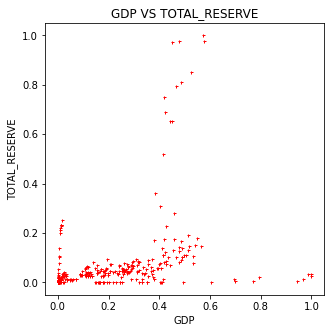

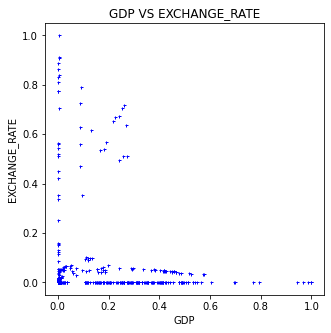

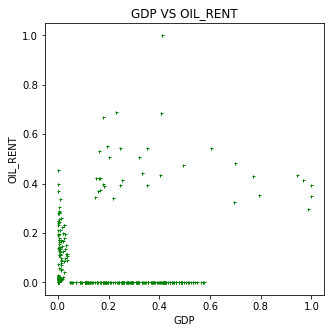

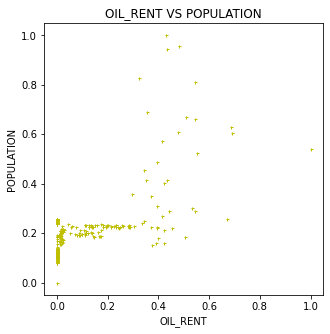

In [198]:
def plotGraph(df, col1, col2, color):
    """
    Produces a square plot of two columns of dataframe df using small circle 
    symbols.
    """
    
    plt.figure(figsize=(5.0,5.0))
    plt.plot(df[col1], df[col2], "+", markersize=3, color=color)
    
    plt.title(col1 + " VS " + col2)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
    
    
#plots
plotGraph(df, "GDP", "TOTAL_RESERVE", "r")
plotGraph(df, "GDP", "EXCHANGE_RATE","b")
plotGraph(df, "GDP", "OIL_RENT","g")
plotGraph(df, "OIL_RENT", "POPULATION","y")

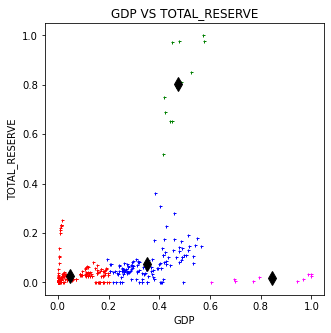

In [199]:
####### kmeans set up the clusterer, 4 expected clusters
kmeans = cluster.KMeans(n_clusters=4)

# extract columns for fitting
df_fit = df[["GDP", "TOTAL_RESERVE"]].copy()
kmeans.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))

col = ["blue", "red", "green", "magenta"]
for l in range(4):     # loop over the different labels
    plt.plot(df_fit["GDP"][labels==l], df_fit["TOTAL_RESERVE"][labels==l], "+", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(4):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)

plt.title("GDP VS TOTAL_RESERVE")    
plt.xlabel("GDP")
plt.ylabel("TOTAL_RESERVE")
plt.show()